In [1]:
#LINEAR REGRESSION MAINLY DEAL WITH NUMERIAL VALUES, THAT HAS NUMERICAL O/P

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
conda install seaborn

Retrieving notices: done
Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [12]:
df["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [13]:
df["price"].unique().sum()

1150235940

In [14]:
df["bathrooms"].unique()

array([2, 4, 1, 3])

Check for infinite values and replace with NaN


In [15]:
df.replace([np.inf, -np.inf], np.nan , inplace = True)

Drop rows with NaN values

In [16]:
df.dropna(subset = ['price'], inplace = True)

In [17]:
# Set the asthetic style of the plots

In [18]:
sns.set_style("whitegrid") #

In [19]:
#SCATTER PLOT OF PRICE VS AREA

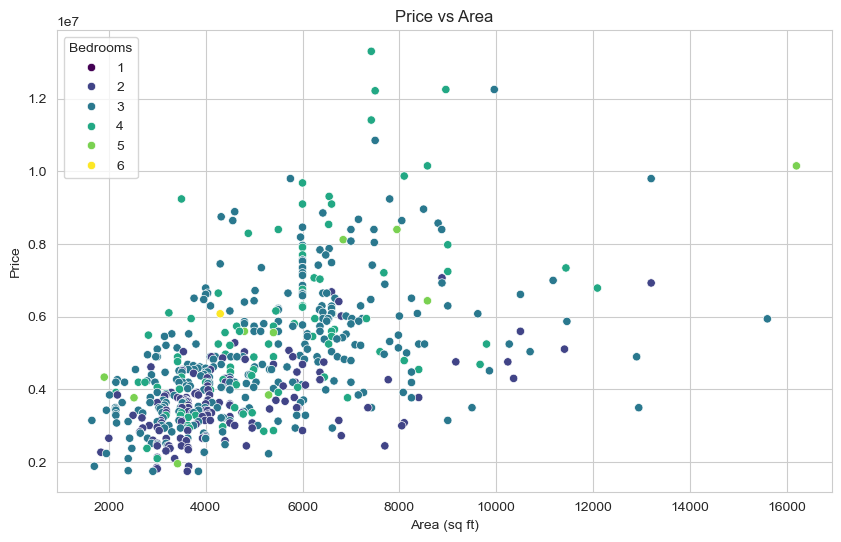

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y = 'price', data = df, hue = 'bedrooms', palette = 'viridis')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title= 'Bedrooms')
plt.show()

In [21]:
#Distribution plot of prices

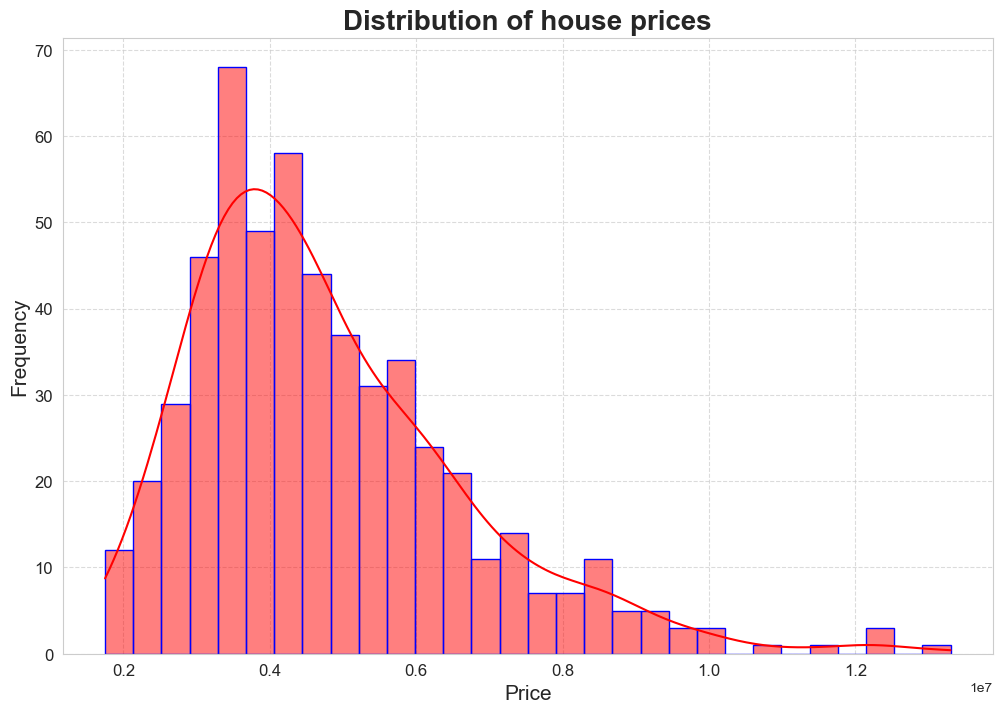

In [22]:
plt.figure(figsize = (12,8))
sns.histplot(df['price'], bins= 30, kde = True, color = 'red', edgecolor = 'blue')
plt.title('Distribution of house prices', fontsize = 20, weight = 'bold')
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

#Adding a grid
plt.grid(True, linestyle = '--', alpha = 0.7)

#To Display the Plot
plt.show()

/var/folders/ht/20_cq08n5k163l0ztnvl3b7r0000gn/T/ipykernel_11717/1595617337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'bedrooms', data = df ,  palette = 'viridis')


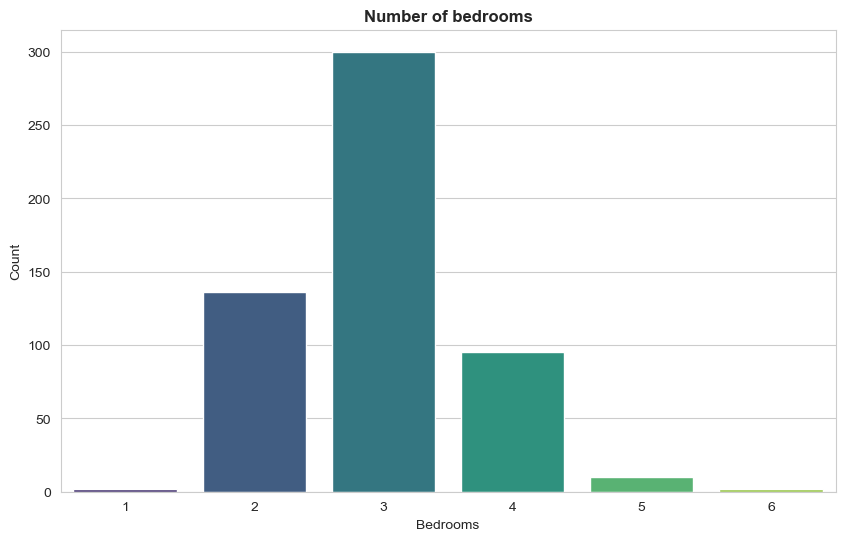

In [23]:
plt.figure(figsize= (10,6))
sns.countplot(x = 'bedrooms', data = df ,  palette = 'viridis')
plt.title('Number of bedrooms', weight = 'bold')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

/var/folders/ht/20_cq08n5k163l0ztnvl3b7r0000gn/T/ipykernel_11717/2759386470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'bathrooms', data = df , palette = 'viridis')


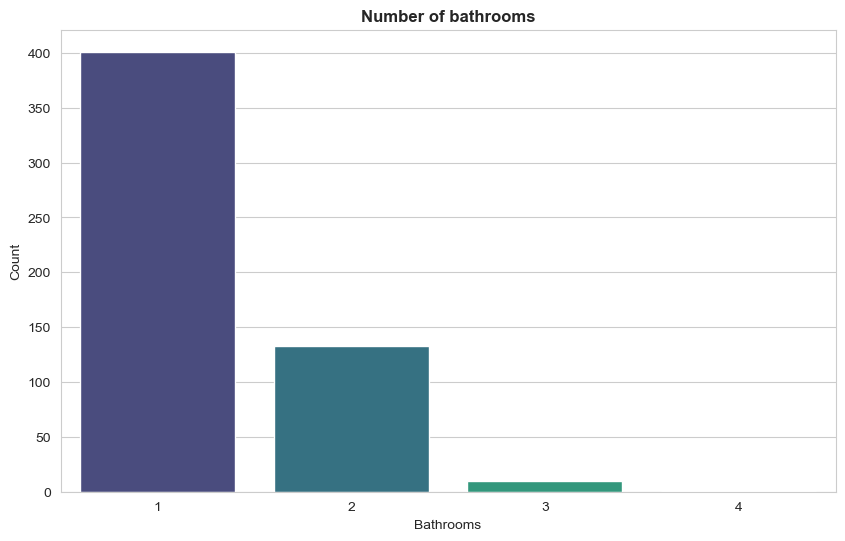

In [24]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'bathrooms', data = df , palette = 'viridis')
plt.title('Number of bathrooms', weight = 'bold')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [25]:
#Selecting relevant columns

In [26]:
df = df[['area', 'bedrooms','bathrooms','price']]

In [27]:
#Creating Independent and Dependant Variables
x = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']

In [28]:
x.shape

(545, 3)

In [29]:
#Splitting the dataset into training and testing sets

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
#80% is training data

In [31]:
#Initializing the linear regression model

In [32]:
model = LinearRegression()

In [33]:
#Training the model

In [34]:
model.fit(x_train, y_train)

LinearRegression()

In [35]:
#Making Predictions

In [36]:
y_pred= model.predict(x_train)
y_pred

array([ 6057517.06636272,  6472076.95046246,  3520500.76920229,
        3464065.73613957,  3857897.62603431,  4293185.50433903,
        3892444.28304262,  4315986.29796452,  3660981.68108694,
        4642106.74012298,  3640253.68688195,  4862292.9274051 ,
        4980663.97880442,  3795713.64341935,  3238600.04801447,
        6212977.02290012,  3391517.75642211,  6175888.11776205,
        5127141.80451966,  8521606.12862638,  6492804.94466744,
        3598797.69847198,  4358824.15265482,  5464317.17692078,
        6238887.01565636,  3823350.969026  ,  3457971.32001725,
        3944264.26855509,  5213666.21778886,  4150631.79303389,
        3778440.3149152 ,  2836476.96043773,  3650617.68398445,
        4524648.10629472,  3303423.78105092,  5000479.55543834,
        3559883.95819177,  6202613.02579763,  5411494.58030731,
        6874733.20043094,  7684540.629315  ,  5781234.00382617,
        4621378.74591799,  3557341.71006201,  4399367.72349373,
        3764621.65211187,  5720874.85635